In [1]:
using Pkg
Pkg.activate("../env")
# Pkg.add("Colors")
# Pkg.add("LaTeXStrings")

  Activating project at `~/Developer/ReactLD.jl/env`


In [2]:
using CSV, DataFrames
using Statistics, Distributions
using Plots, Colors, LaTeXStrings

In [3]:
# ABCX_per_path = "results/ABCX_per_sim11000.csv"
# df_x = CSV.read(ABCX_per_path, DataFrame)

# ABCV_beta_n5_path = "results/ABCV_sim20000_beta1.0e-5_Δt1.0e-7_T0.25.csv"
# ABCV_df_beta_n5 = CSV.read(ABCV_beta_n5_path, DataFrame)

# ABCV_beta_n4_path = "results/ABCV_sim20000_beta1.0e-4_Δt1.0e-7_T0.25.csv"
# ABCV_df_beta_n4 = CSV.read(ABCV_beta_n4_path, DataFrame)

ABCV_beta_e6_path = "results/ABCV_sim500_beta1.0e6_Δt1.0e-6.csv"
ABCV_df_beta_e6 = CSV.read(ABCV_beta_e6_path, DataFrame)

ABCV_beta_e5_path = "results/ABCV_sim500_beta1.0e5_Δt1.0e-6.csv"
ABCV_df_beta_e5 = CSV.read(ABCV_beta_e5_path, DataFrame)

ABCV_beta_e4_path = "results/ABCV_sim500_beta1.0e4_Δt1.0e-6.csv"
ABCV_df_beta_e4 = CSV.read(ABCV_beta_e4_path, DataFrame)

ABCV_beta_e3_path = "results/ABCV_sim500_beta1.0e3_Δt1.0e-6.csv"
ABCV_df_beta_e3   = CSV.read(ABCV_beta_e3_path, DataFrame)

ABCV_beta_e2_path = "results/ABCV_sim500_beta1.0e2_Δt1.0e-6.csv"
ABCV_df_beta_e2 = CSV.read(ABCV_beta_e2_path, DataFrame)

ABCV_beta_e1_path = "results/ABCV_sim500_beta1.0_Δt1.0e-6.csv"
ABCV_df_beta_e1 = CSV.read(ABCV_beta_e1_path, DataFrame)

ABCX_path = "results/ABCX_sim500_Δt1.0e-6_T0.3_C1.25e-4.csv"
ABCX_df = CSV.read(ABCX_path, DataFrame)

println(ABCX_df[1:10, :])

10×1 DataFrame
 Row │ mean     
     │ Float64  
─────┼──────────
   1 │ 1000.0
   2 │  999.078
   3 │  998.128
   4 │  997.228
   5 │  996.316
   6 │  995.392
   7 │  994.49
   8 │  993.622
   9 │  992.818
  10 │  991.888


In [4]:
# Parameters
const DIM = 3          # dim of the domain

p = (;
    Ω_inf =  0.0,       # nm
    Ω_sup = 200.0,      # nm
    T     = 0.3,        # s 0.5
    Δt    = 1.0e-6,     # s
    C₀    = 1.25e-6,    # nm^{-3}
)

(Ω_inf = 0.0, Ω_sup = 200.0, T = 0.3, Δt = 1.0e-6, C₀ = 1.25e-6)

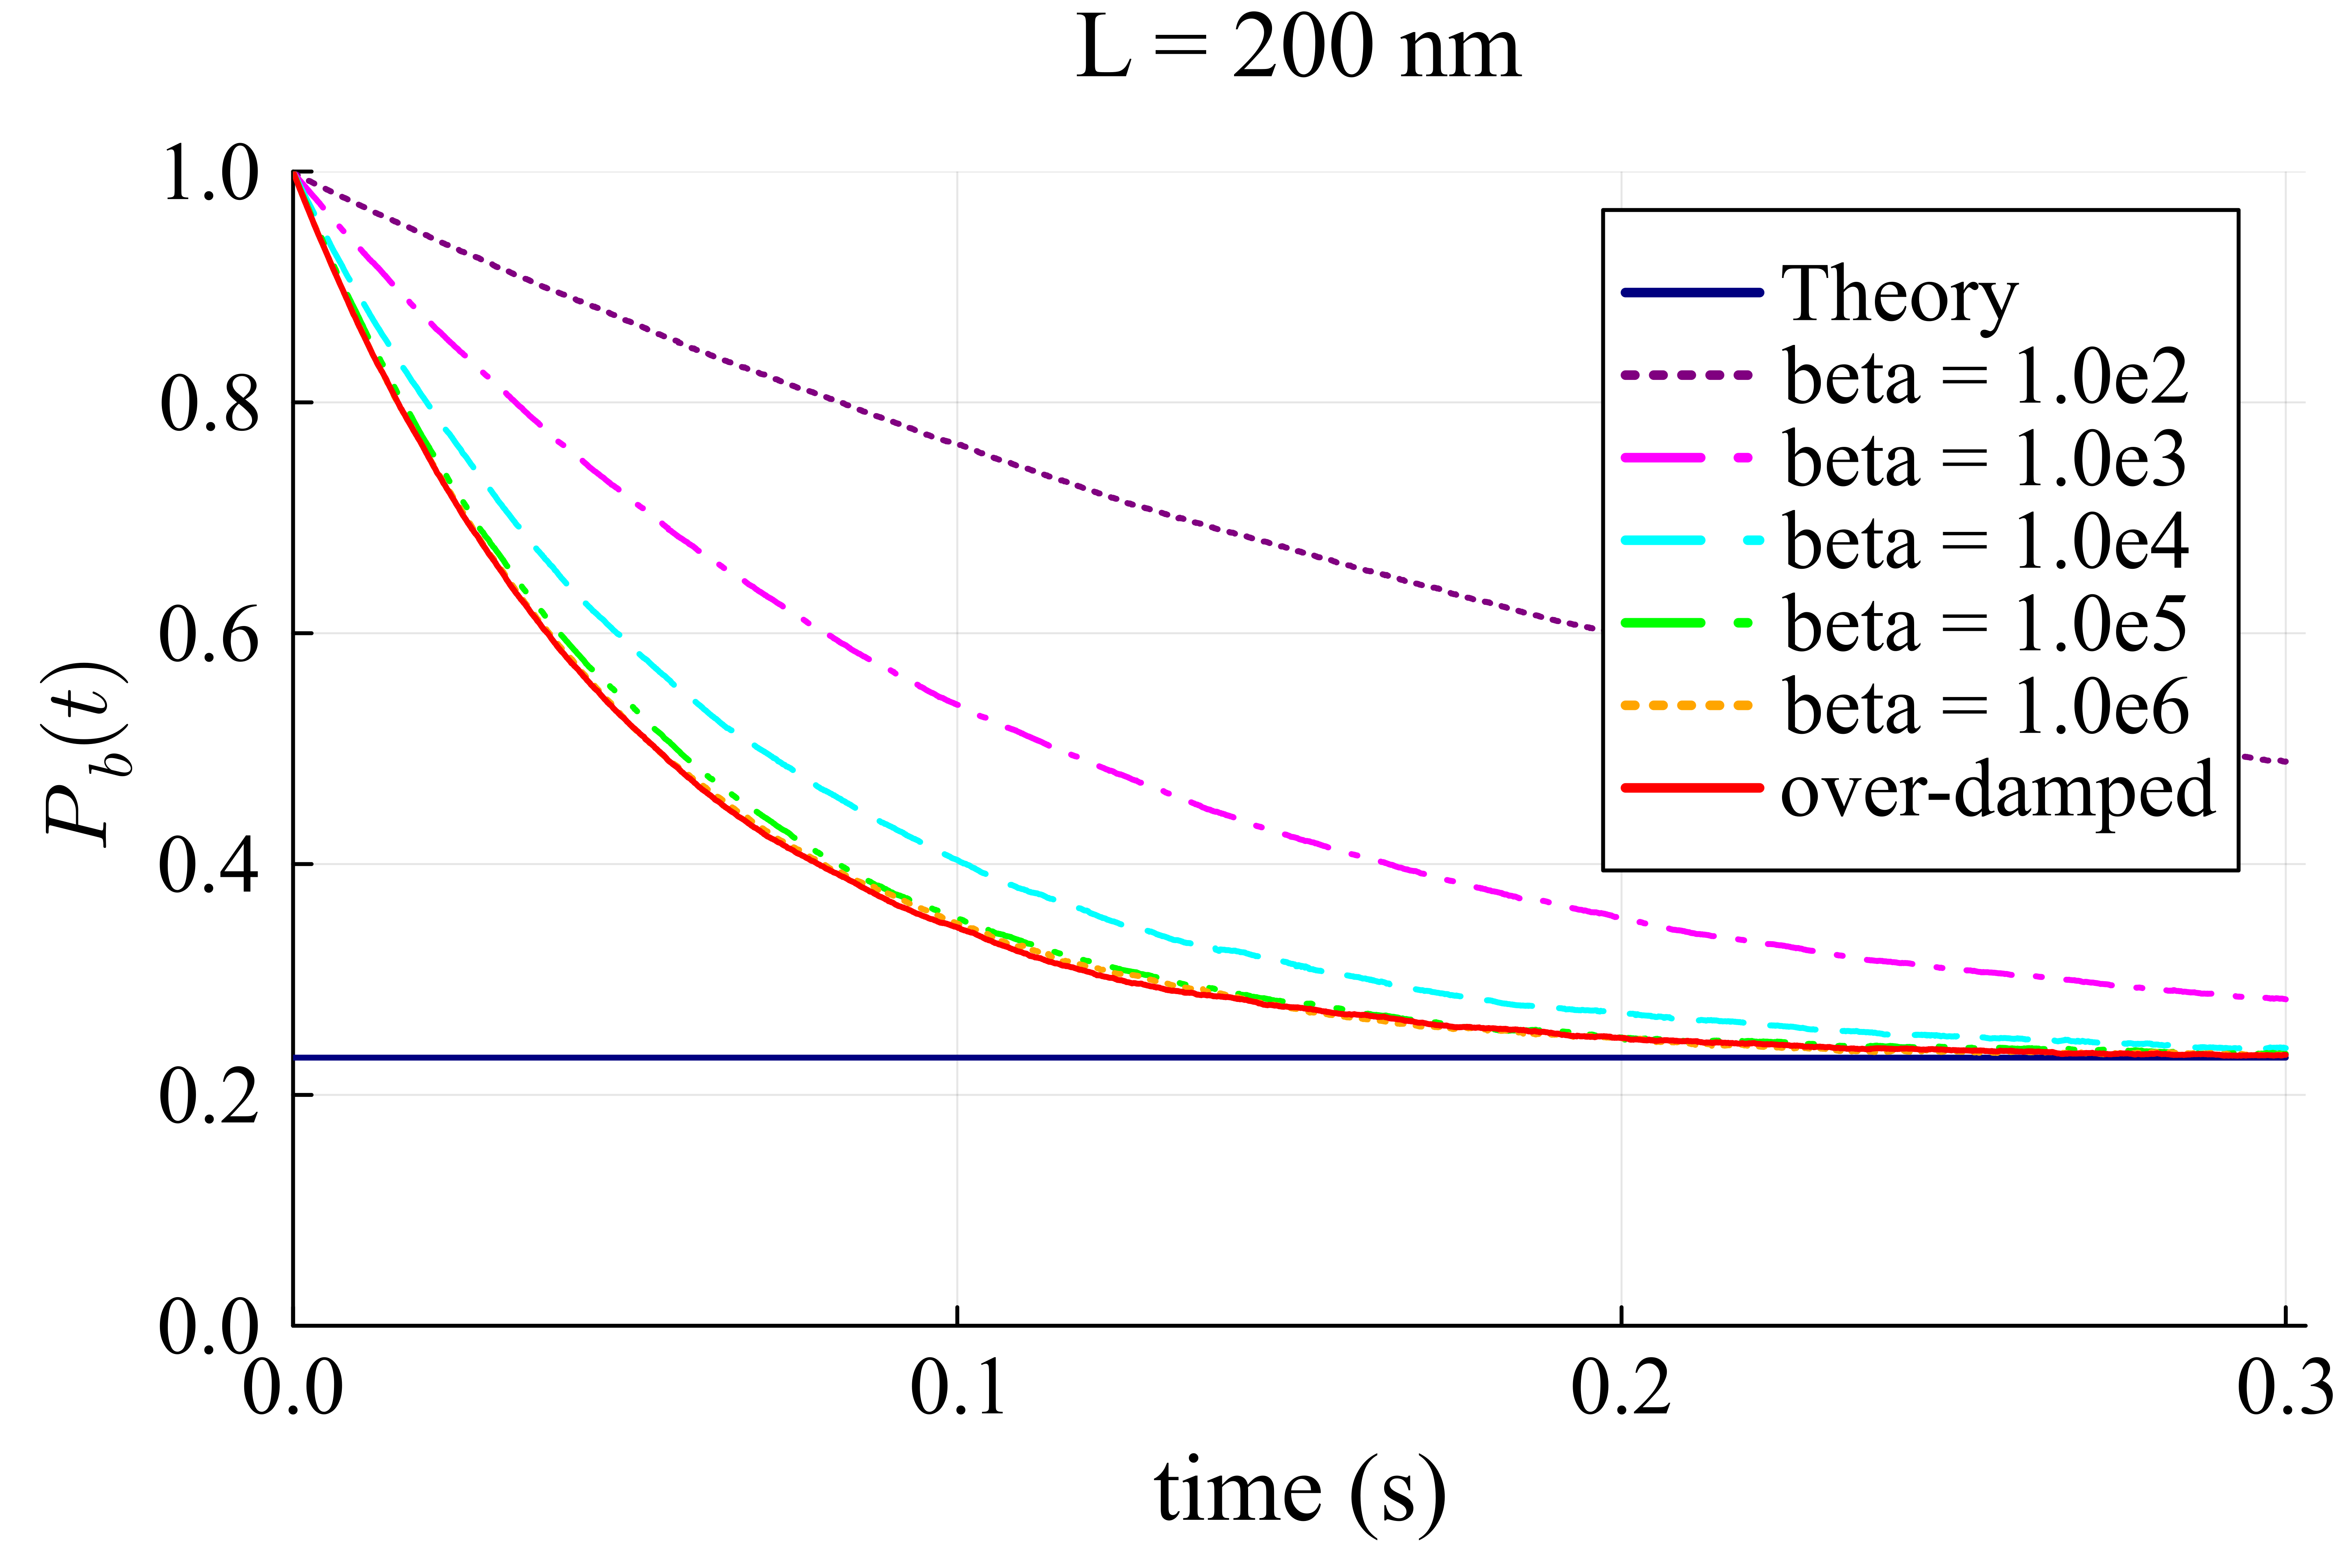

"/Users/c2yao/Developer/ReactLD.jl/AB_C_V_large/present/main_single_particle.png"

In [5]:
# time_steps = p.Δt * collect(0:num_time_steps)
num_time_steps = Int(floor(p.T / p.Δt))
save_time_step = p.T / 5000
t_steps = 0:save_time_step:p.T
line_width = 1.5

gr(dpi=1000)

ref_line = fill(0.2323, length(t_steps))
plot(t_steps, ref_line,
      label="Theory",
      color="navyblue", 
      linewidth=line_width,
      linestyle=:solid,
      xlabel="time (s)",
      ylabel=L"P_b(t)",
      title="L = 200 nm",
      titlefont=font("Times New Roman", 15),
      guidefont=font("Times New Roman", 15),
      tickfont=font("Times New Roman", 13),
      legendfont=font("Times New Roman", 13))

plot!(t_steps, ABCV_df_beta_e2.mean,
      label="beta = 1.0e2",
      color="purple",
      linewidth=line_width,
      linestyle=:dot)

plot!(t_steps, ABCV_df_beta_e3.mean,
      label="beta = 1.0e3",
      color="magenta",
      linewidth=line_width,
      linestyle=:dashdot)

plot!(t_steps, ABCV_df_beta_e4.mean,
      label="beta = 1.0e4",
      color="cyan",
      linewidth=line_width,
      linestyle=:dash)

plot!(t_steps, ABCV_df_beta_e5.mean,
      label="beta = 1.0e5",
      color="lime",
      linewidth=line_width,
      linestyle=:dashdotdot)

plot!(t_steps, ABCV_df_beta_e6.mean,
      label="beta = 1.0e6",
      color="orange",
      linewidth=line_width,
      linestyle=:dot)

plot!(t_steps, ABCX_df.mean / 1000.0,
      label="over-damped",
      color="red",
      linewidth=line_width,
      linestyle=:solid,
      left_margin=3Plots.mm,
      top_margin=4Plots.mm,
      bottom_margin=3Plots.mm)

ylims!(0.0, 1.0)
xlims!(0.0, 1.01 * p.Δt * num_time_steps)

display(plot!())
savefig("present/main_single_particle.png")

### Error Plot

In [ ]:
# β_vec   = [1.0e2, 1.0e3, 1.0e4, 1.0e5]
# err_vec = zeros(length(β_vec))

# vec_x = ABCX_df.mean / 1000.0

# for i in 1:length(β_vec)
#     df_i_name = Symbol("ABCV_df_beta_e$(i+1)")
#     df_i = eval(df_i_name)
#     vec_i = df_i.mean
#     err_vec[i] = maximum(abs.(vec_i .- vec_x))
# end

# # natural log
# log_β   = [log(βᵢ) for βᵢ in β_vec]
# log_err = [log(err_i) for err_i in err_vec];

In [12]:
β_vec   = [1.0e2, 1.0e3, 1.0e4, 1.0e5]
err_vec = zeros(length(β_vec))

vec_x = ABCX_df.mean / 1000.0

for i in 1:length(β_vec)
    df_i_name = Symbol("ABCV_df_beta_e$(i+1)")
    df_i = eval(df_i_name)
    vec_i = df_i.mean
    err_vec[i] = maximum(abs.(vec_i .- vec_x))
end

log10_β   = [log10(βᵢ) for βᵢ in β_vec]
log10_err = [log10(err_i) for err_i in err_vec];

In [7]:
using Pkg
# Pkg.add("GLM")
# Pkg.add("DataFrames")

using GLM
using DataFrames

In [ ]:
# data = DataFrame(x=log_β[2:4], y=log_err[2:4])
# model = lm(@formula(y ~ x), data)
# println("Coefficients: ", coef(model))

Coefficients: [2.180953201340815, -0.5348743586278081]


In [13]:
data = DataFrame(x=log10_β[2:4], y=log10_err[2:4])
model = lm(@formula(y ~ x), data)
println("Coefficients: ", coef(model))

Coefficients: [0.9471759406315644, -0.5348743586278122]


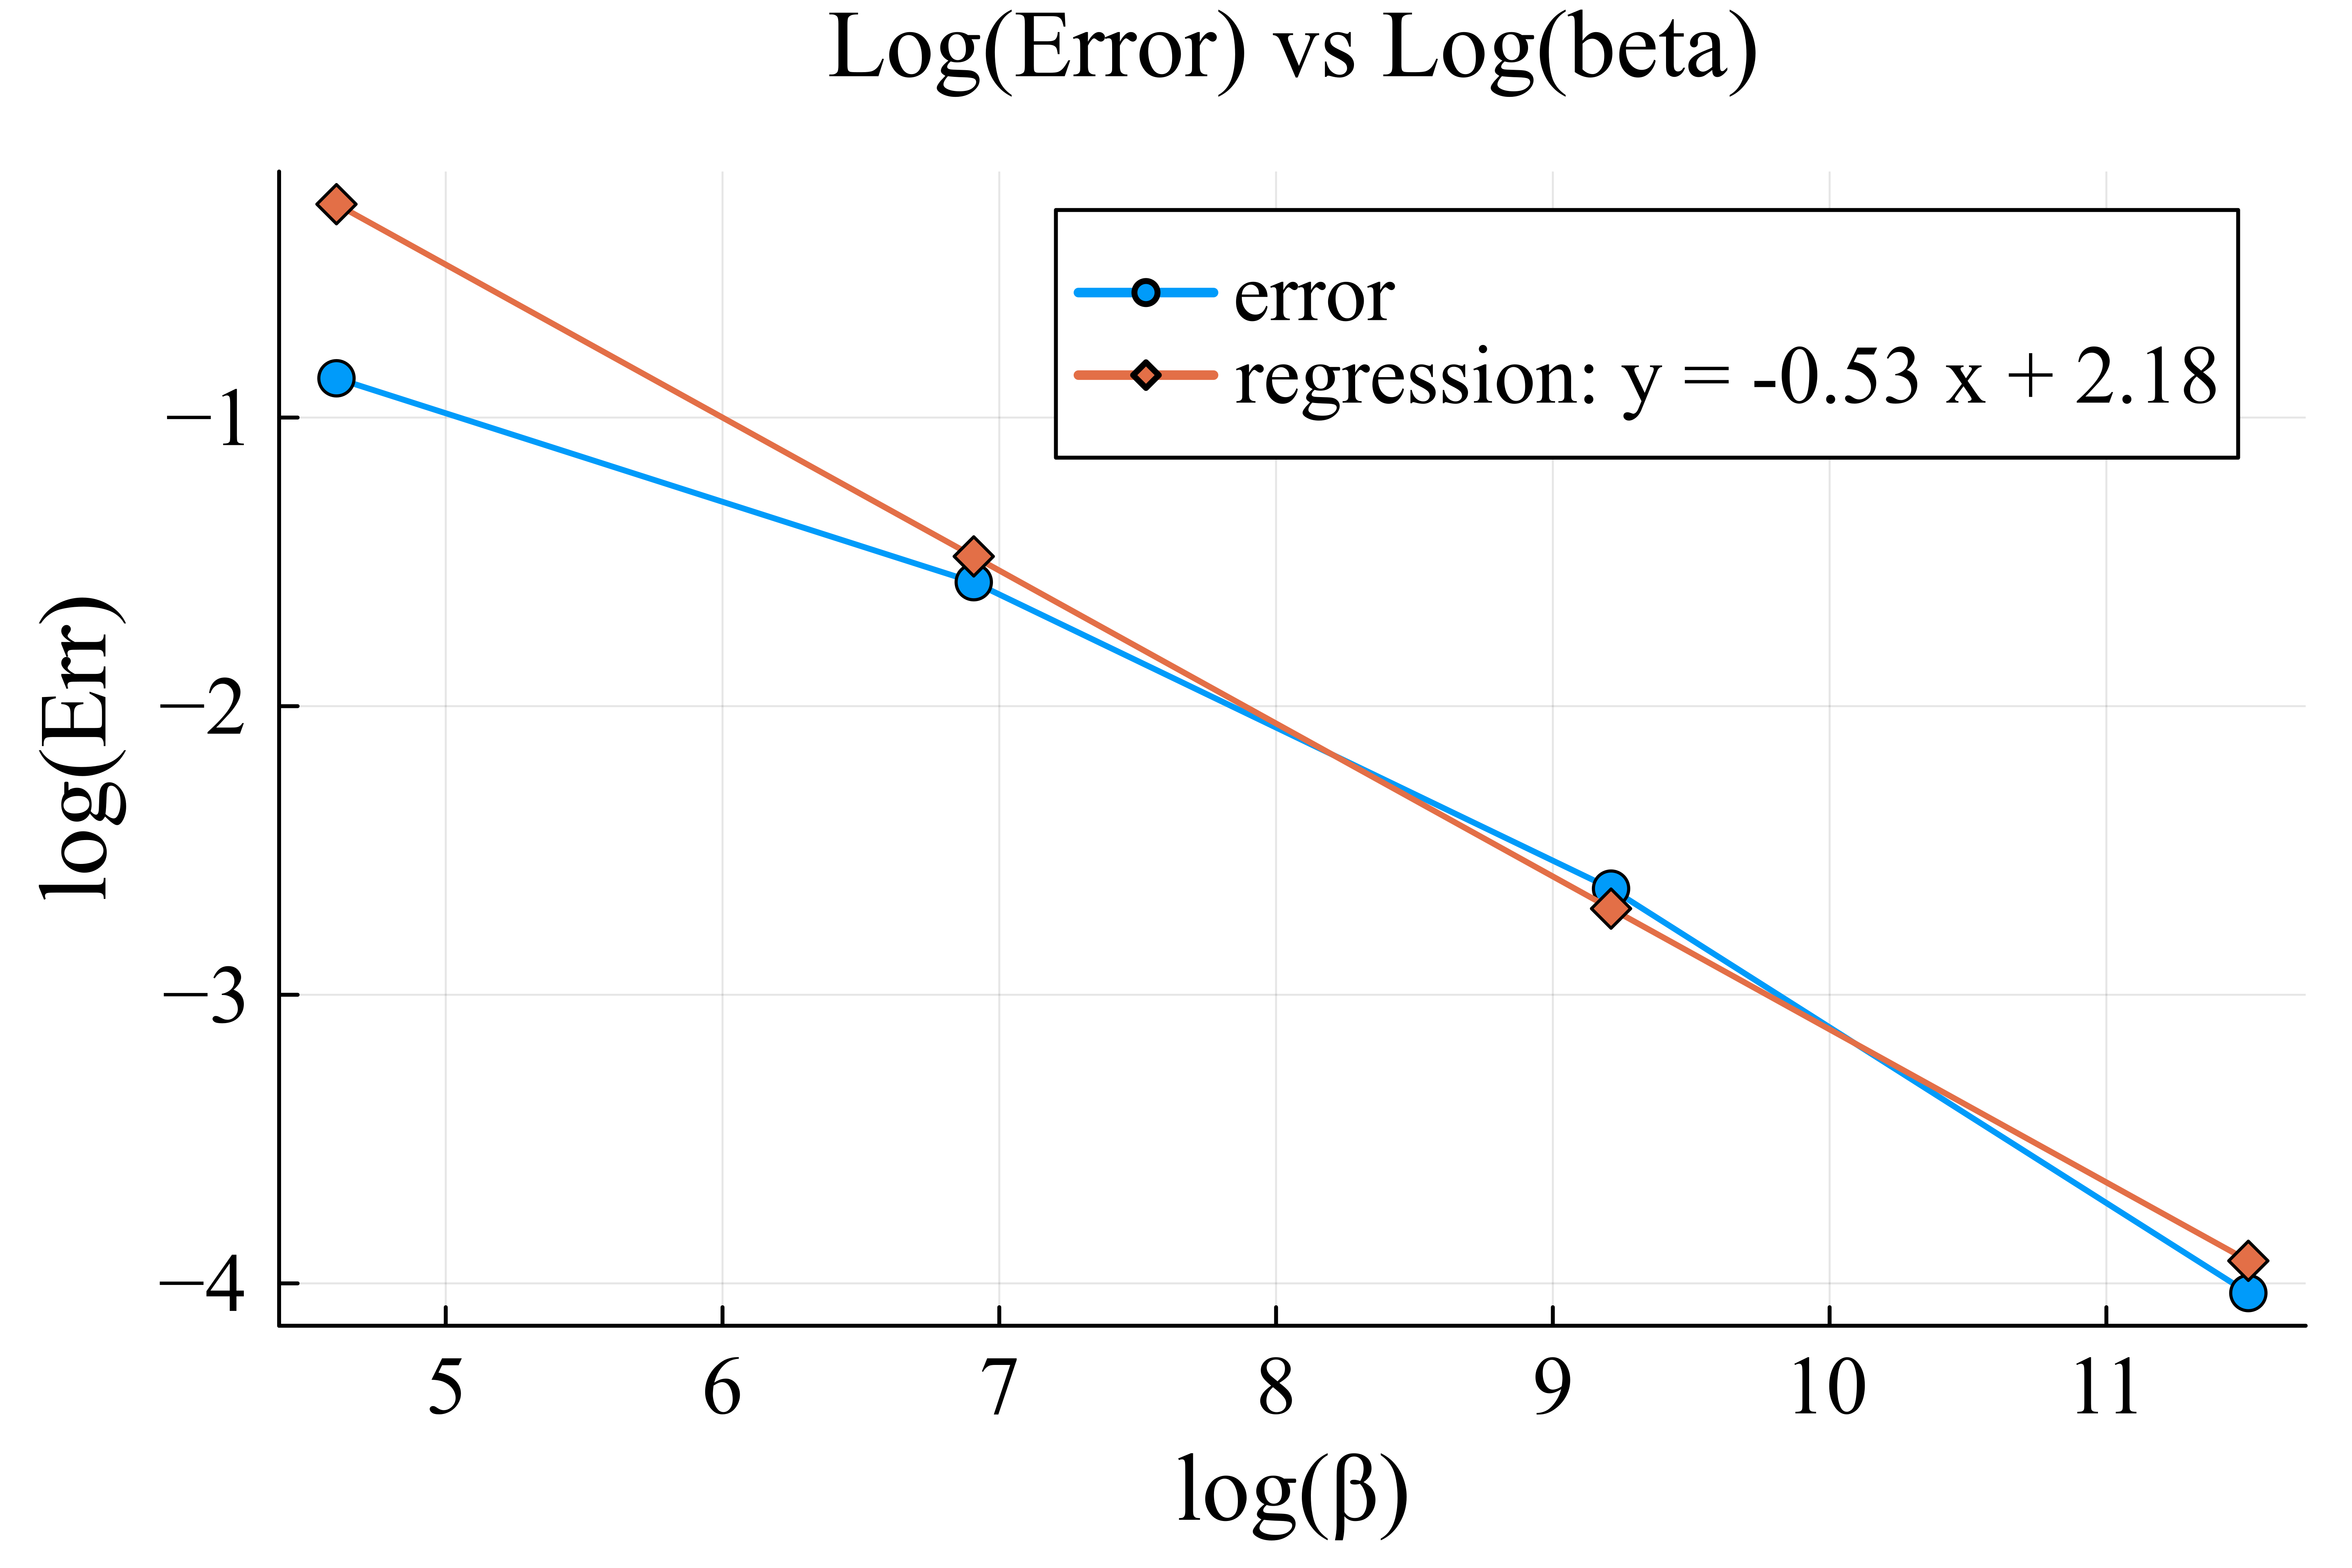

"/Users/c2yao/Developer/ReactLD.jl/AB_C_V_large/present/loss_single_particle.png"

In [9]:
plot(log_β, log_err,
    # xscale=:log10,
    # yscale=:log10,
    xlabel="log(β)",
    ylabel="log(Err)",
    label="error",
    title="Log(Error) vs Log(beta)",
    titlefont=font("Times New Roman", 15),
    guidefont=font("Times New Roman", 15),
    tickfont=font("Times New Roman", 13),
    legendfont=font("Times New Roman", 13),
    linewidth=1.5,
    marker=:circle,
    markersize=5)

# x_space = [1.0e2, 1.0e3, 1.0e4, 1.0e5]
# y_space = 10 .^ (-0.53 * [2.0, 3.0, 4.0, 5.0] .+ 2.18)

x_space = log_β
y_space = -0.53 * log_β .+ 2.18

plot!(x_space, y_space,
    # xscale=:log10,
    # yscale=:log10,
    linewidth=1.5,
    label="regression: y = -0.53 x + 2.18",
    left_margin=3Plots.mm,
    top_margin=4Plots.mm,
    bottom_margin=3Plots.mm,
    marker=:diamond,
    markersize=5)
display(plot!())
savefig("present/loss_single_particle.png")

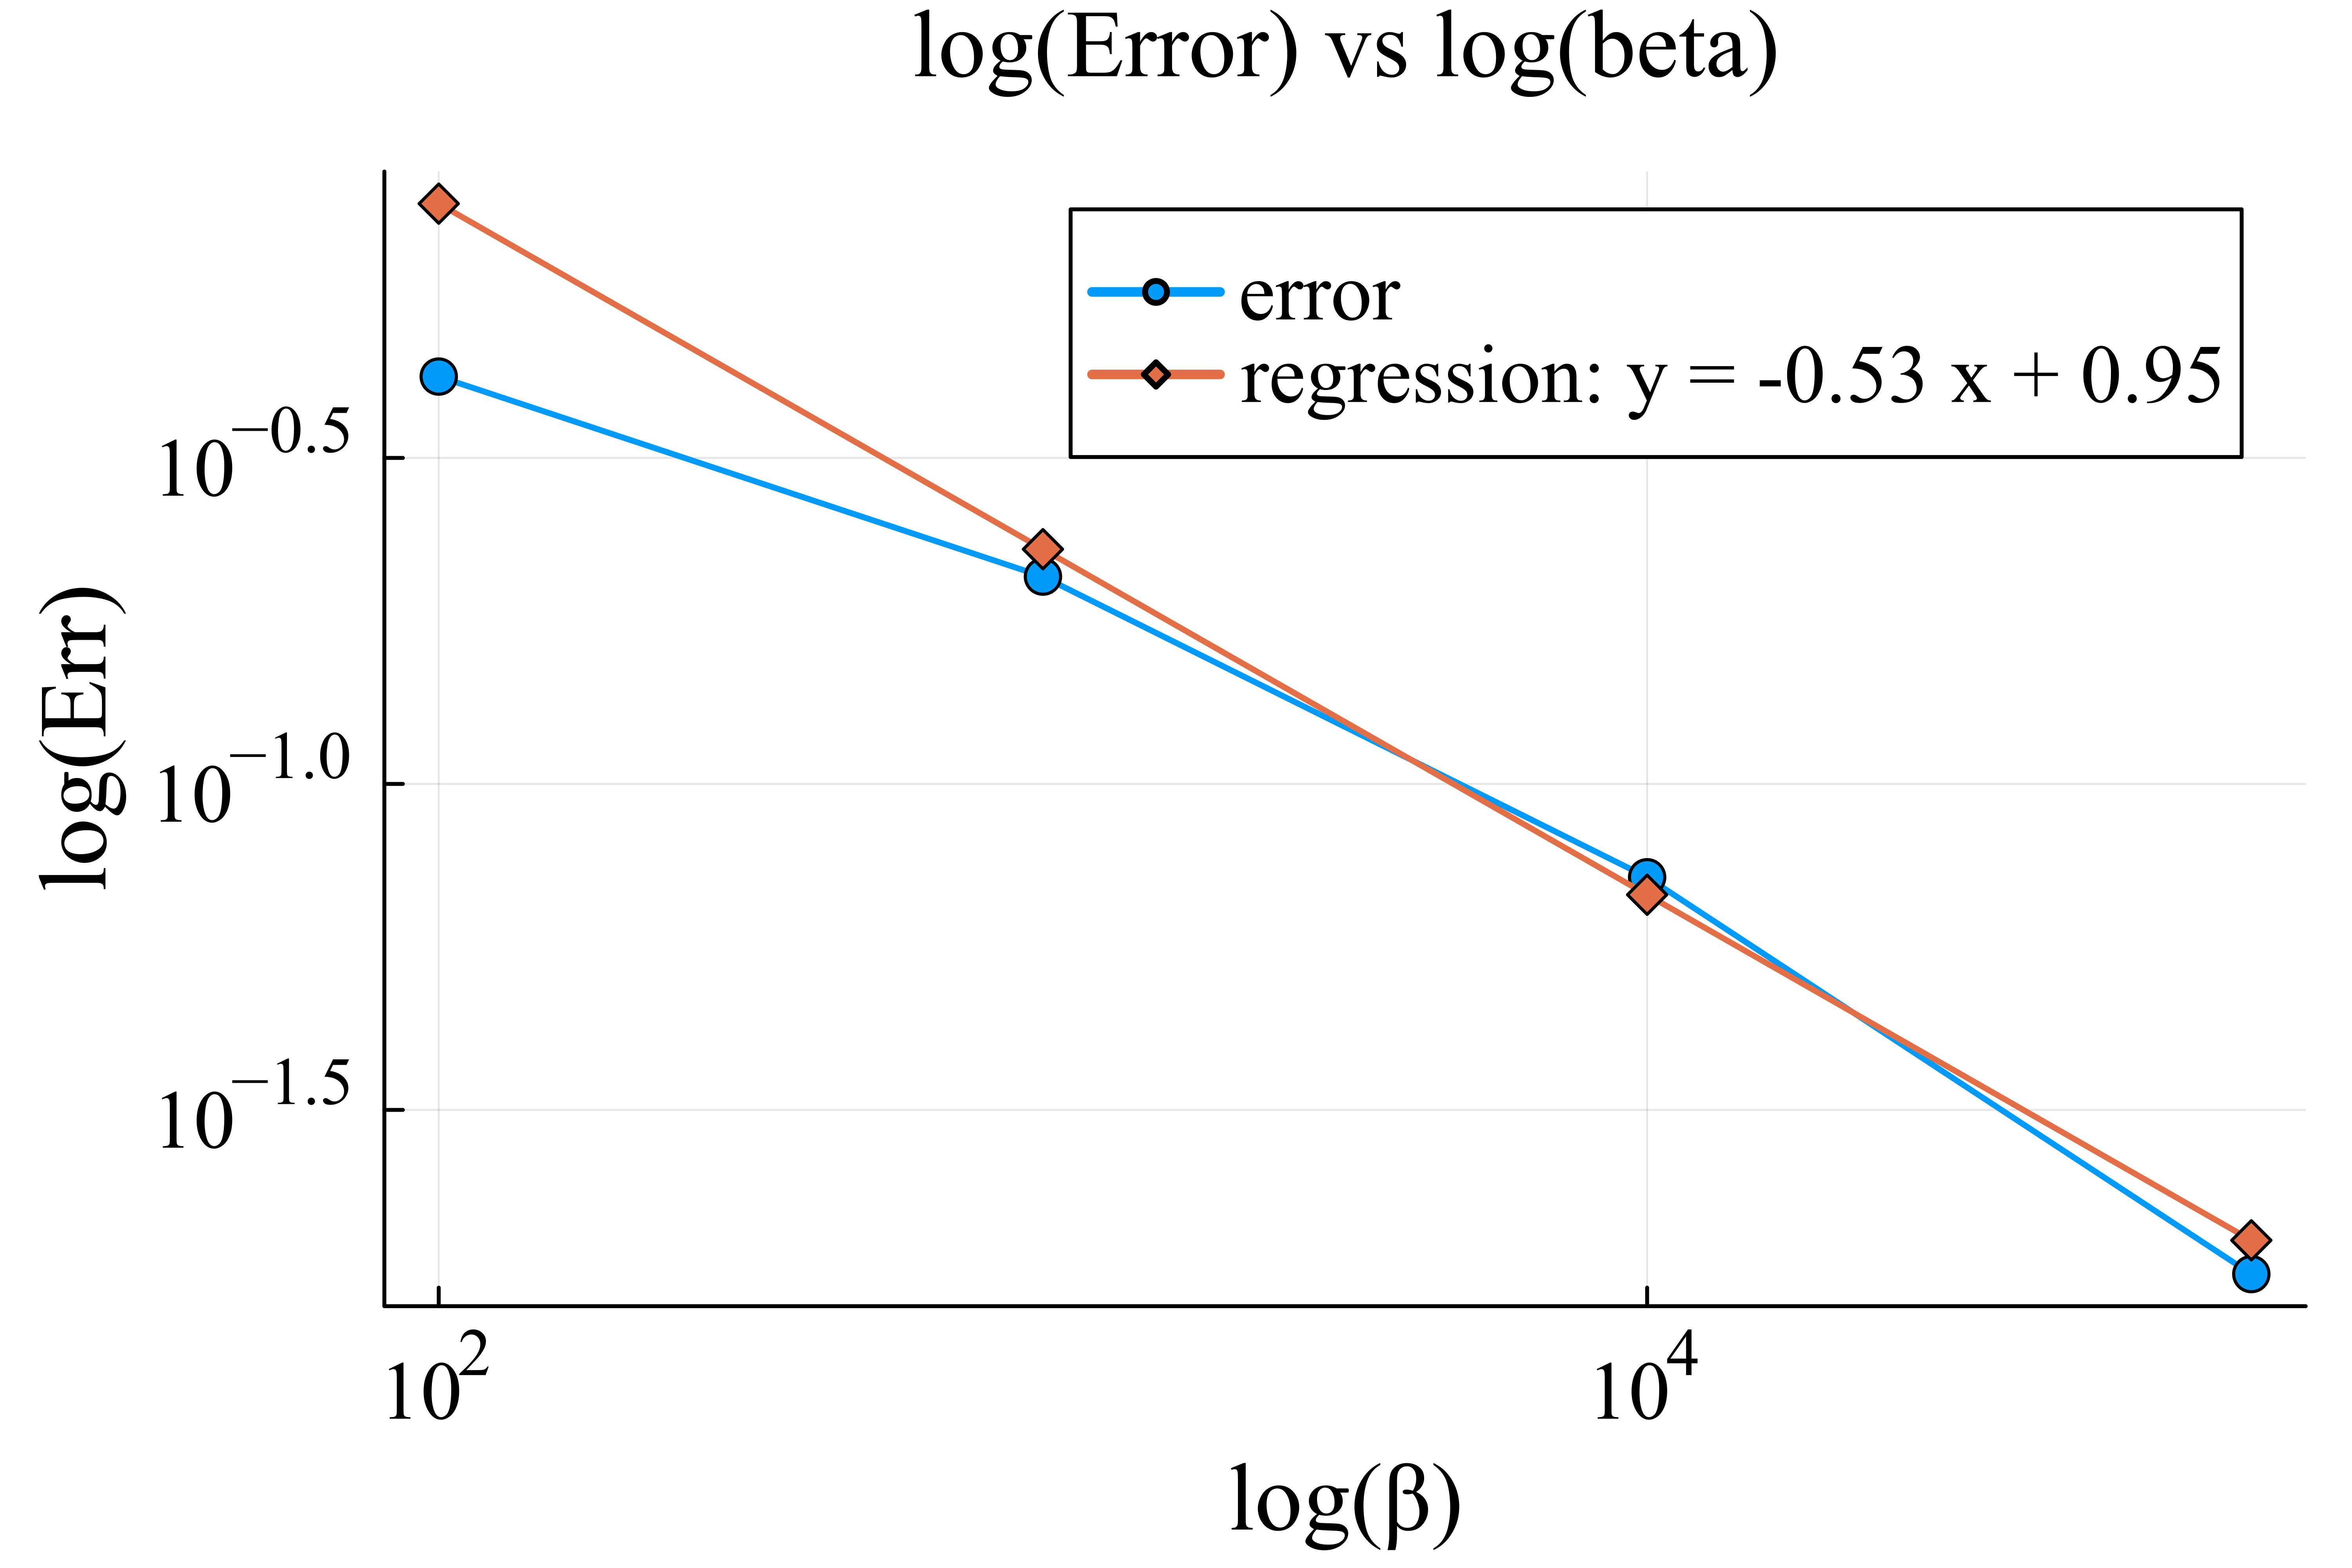

"/Users/c2yao/Developer/ReactLD.jl/AB_C_V_large/present/loss_single_particle.png"

In [16]:
plot(β_vec, err_vec,
     xscale=:log10, 
     yscale=:log10,
     xlabel="log(β)",
     ylabel="log(Err)",
     label="error",
     title="log(Error) vs log(beta)",
     titlefont=font("Times New Roman", 15),
     guidefont=font("Times New Roman", 15),
     tickfont=font("Times New Roman", 13),
     legendfont=font("Times New Roman", 13),
     linewidth=1.5,
     marker=:circle, 
     markersize=5)

x_space = β_vec
y_space = 10 .^ (-0.53 * log10_β .+ 0.95)
# x_space = log_β
# y_space = -0.53 * log_β .+ 2.18
plot!(x_space, y_space,
      xscale=:log10,
      yscale=:log10,
      linewidth=1.5,
      label="regression: y = -0.53 x + 0.95",
      left_margin=3Plots.mm,
      top_margin=4Plots.mm,
      bottom_margin=3Plots.mm,
      marker=:diamond,
      markersize=5)
display(plot!())
savefig("present/loss_single_particle.png")